In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
base_path = 'Models/'
csv_files = []

In [5]:
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file == 'training_metrics.csv':
            csv_files.append(os.path.join(root, file))

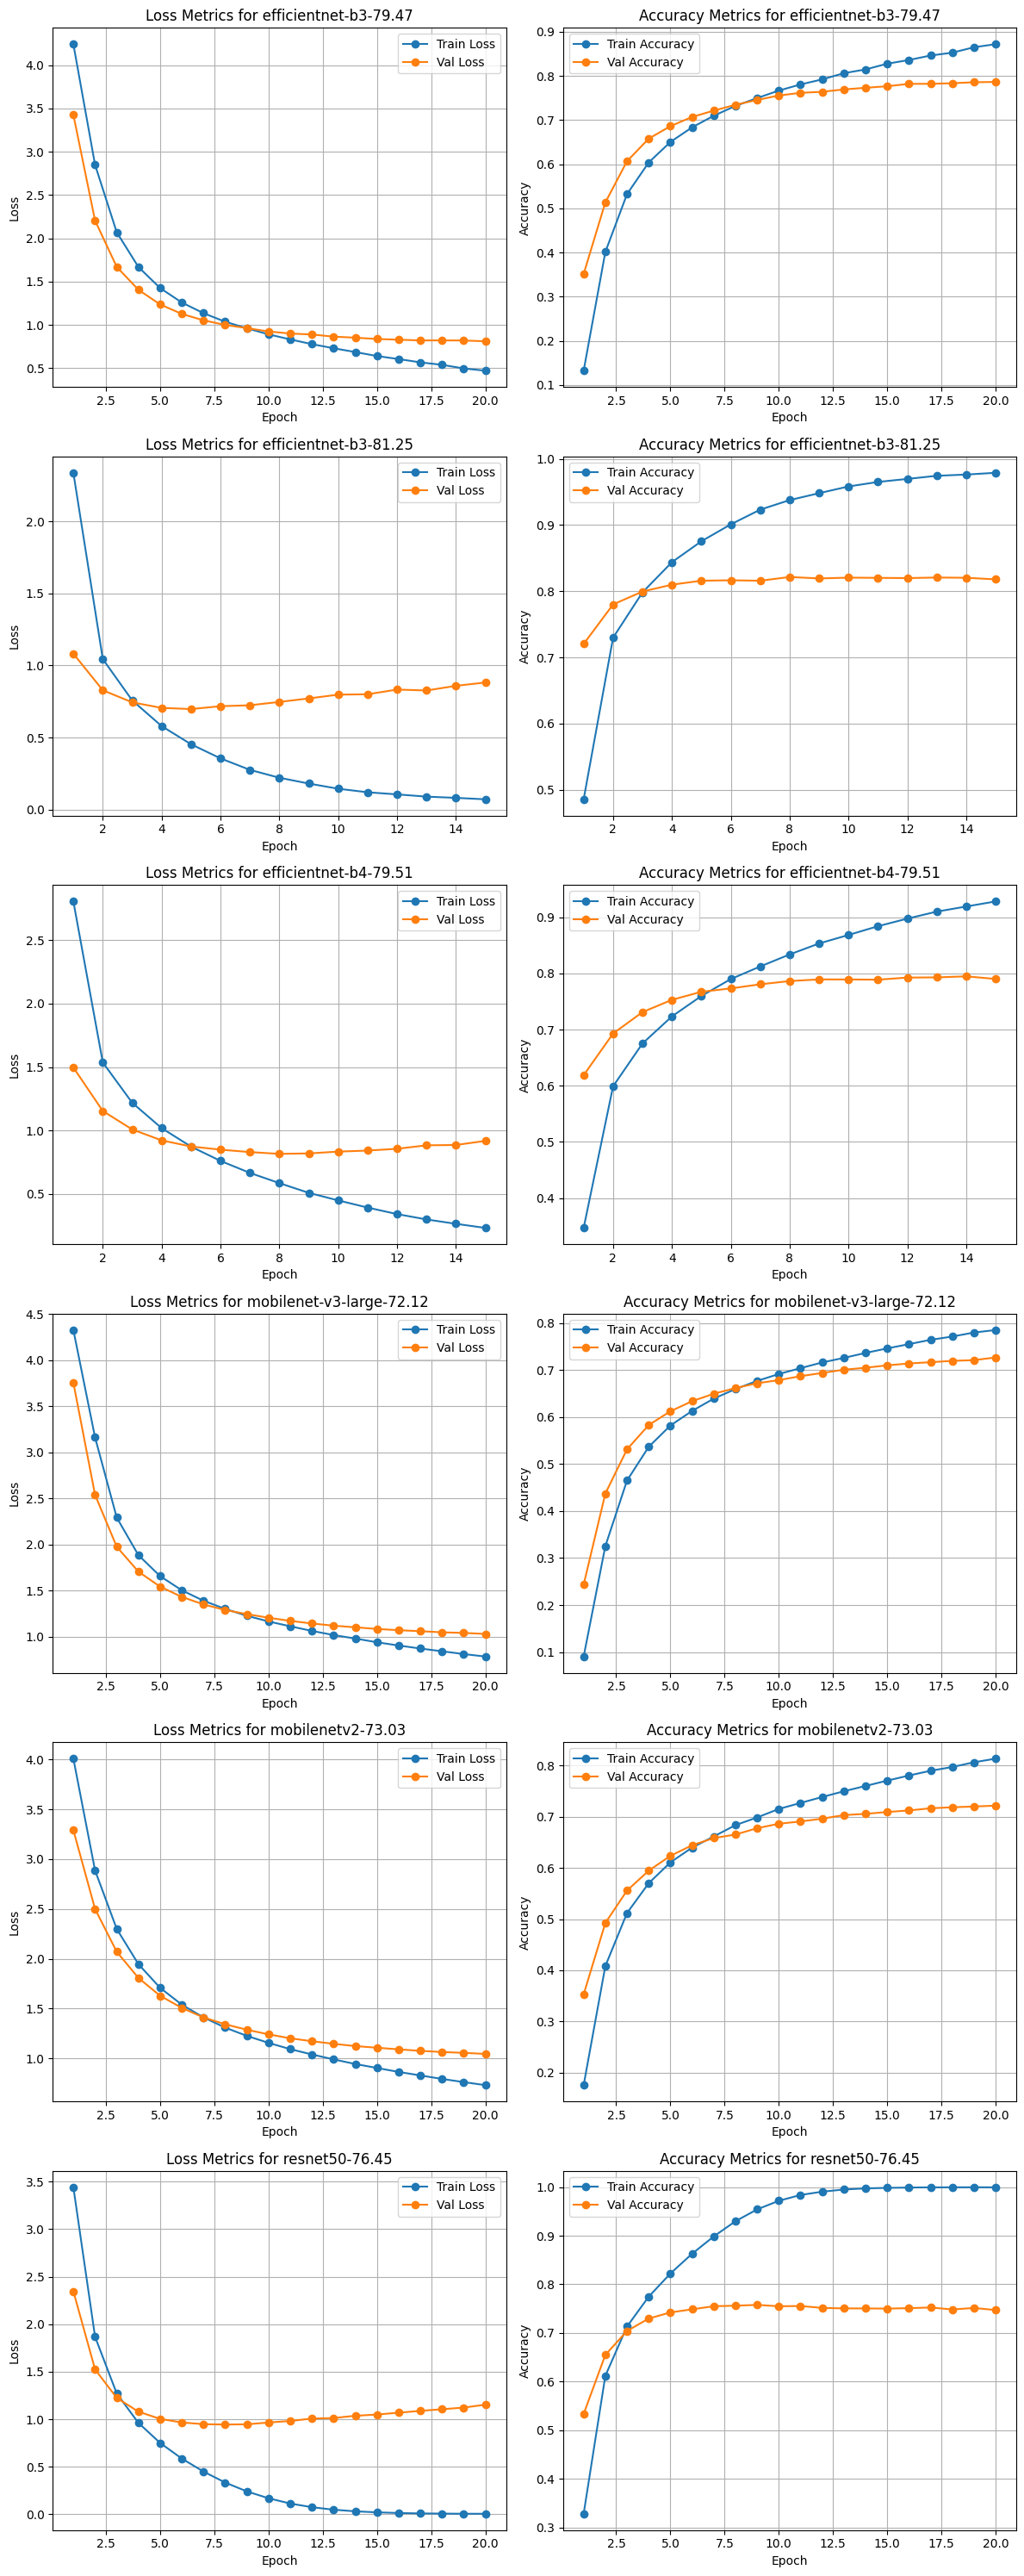

In [6]:
if not csv_files:
    print("No training_metrics.csv files found!")
else:
    # Create subplots to organize plots
    fig, axs = plt.subplots(len(csv_files), 2, figsize=(12, 5 * len(csv_files)))
    if len(csv_files) == 1:
        axs = [axs] 

    for i, csv_file in enumerate(csv_files):
        df = pd.read_csv(csv_file)

        folder_name = os.path.basename(os.path.dirname(csv_file))

        # Plot Losses
        axs[i][0].plot(df['Epoch'], df['Train Loss'], label='Train Loss', marker='o')
        axs[i][0].plot(df['Epoch'], df['Val Loss'], label='Val Loss', marker='o')
        axs[i][0].set_title(f'Loss Metrics for {folder_name}')
        axs[i][0].set_xlabel('Epoch')
        axs[i][0].set_ylabel('Loss')
        axs[i][0].legend()
        axs[i][0].grid(True)

        # Plot Accuracies
        axs[i][1].plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', marker='o')
        axs[i][1].plot(df['Epoch'], df['Val Accuracy'], label='Val Accuracy', marker='o')
        axs[i][1].set_title(f'Accuracy Metrics for {folder_name}')
        axs[i][1].set_xlabel('Epoch')
        axs[i][1].set_ylabel('Accuracy')
        axs[i][1].legend()
        axs[i][1].grid(True)

    plt.tight_layout()
    plt.show()